# `DSML_WS_04` - Introduction to Visualization with Matplotlib and Seaborn

Please work on the following tasks **before** the fourth workshop session.

## 1. Analyzing flight data using Pandas

Last week, you got to know *the* core data science library in Python - Pandas. Let us put what we learned together in a small real-world case.

I have provided you with a small dataset from the City of Cologne, which is publicly available via [this link](https://www.offenedaten-koeln.de/dataset/dienstfluege-co2-stadt-koeln-2019). It contains a summary of all business flights made by employees of the city in 2019. The following information are available:
- *unit*: code of the organisational unit responsible for these flights
- *origin*: origin airport of the flight route 
- *destination*: destination airport of the flight route
- *flights*: number of flights of this route by the respective organisational unit
- *persons*: number of persons from the organisational unit taking this flight route
- *CO2*: total CO2 emitted as a result of these flights in kilograms

Load the csv file called "business_flights_cologne_2019.csv" into a pandas dataframe (note: data is separated by ";"). Afterwards, use your knowledge of pandas to answer the following questions:
1. Is the provided dataset missing data, i. e. are there missing values?
2. How many business flights took place in total in 2019?
3. How many kilograms of CO2 were emitted as a result of these flights in total in 2019?
4. Which flight route emitted most CO2 per flight per person? (hint: you can sort dataframes using `.sort_values(by='column_name', ascending=False)`)
5. Which organisational unit flew the most?
6. What was the most common destination?

In [5]:
# your code here
import numpy as np
import pandas as pd

def load_csv (file):
    if(file == None or file == '' or not file.endswith('.csv')):
        print('No file provided')
        return None
    data = pd.read_csv(file, sep=';')
    print('Data loaded successfully')
    return data


In [6]:

data = load_csv('business_flights_cologne_2019.csv')
print(data.describe())


Data loaded successfully
          flights     persons           CO2
count  236.000000  236.000000    236.000000
mean     2.381356    1.538136   1716.559322
std      2.285642    1.485614   4279.822308
min      1.000000    1.000000    106.000000
25%      2.000000    1.000000    298.000000
50%      2.000000    1.000000    513.000000
75%      2.000000    1.000000   1255.500000
max     20.000000   12.000000  50571.000000


In [7]:

#check for missing values
data[data.isnull().any(axis = 1)] == True


,unit,origin,destination,flights,persons,CO2


In [9]:
#the sum of business class flights in 2019
print('Total sum of flights is:')
data['flights'] = data['flights'].astype(float)
data['CO2'] = data['CO2'].astype(float)
print(data['flights'].sum())

#the sum of CO2 emissions in 2019
print('The total number of CO2 emissions is:')
print(data['CO2'].sum())

#the sum of CO2 emissions in 2019 for business class flights
print('Top 3 most emmitting CO2 routes:')
data['routes'] = data['origin'] + '-'+data['destination']
data_totals = data.groupby(by='routes').sum().copy()
data_totals = data_totals.sort_values(by='CO2', ascending=False)
print(data_totals.head(3))



Total sum of flights is:
562.0
The total number of CO2 emissions is:
405108.0
Top 3 most emmitting CO2 routes:
                                                                                    unit  \
routes                                                                                     
CGN -> MUC -> PEK -> SHA -> FRA:-FRA:                                            Dez. IV   
FRA-GIG                                                                             0152   
CGN-TXL                                Dez. IDez. IDez. IDez. IVDez. VDez. V010101111...   

                                                                                  origin  \
routes                                                                                     
CGN -> MUC -> PEK -> SHA -> FRA:-FRA:                   CGN -> MUC -> PEK -> SHA -> FRA:   
FRA-GIG                                                                           FRAFRA   
CGN-TXL                                CGNCGNCGNCGNCGNCGNCGN

## 2. Getting started with Matplotlib

This week, we will be using Python to visualize data. The library we will be using for this is called Matplotlib.

As always, we first have to import Matplotlib to use its functionalities within this Jupyter notebook. Execute the following cell to continue.

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Fontconfig warning: ignoring UTF-8: not a valid region tag


Now let us create some data to visualize. Think about last week (Monday to Sunday). How many steps did you do per day? If you have a tracker like a smartwatch you could check the exact values, or just come up with some hypothetical values. Create a list of strings for each weekday (i.e., ["Mon", "Tue",...]) and assign it to a variable called `weekdays`. Create a second list with your daily step counts from Monday to Sunday and assign it to a variable called `steps`.

In [24]:
# your code here
import random

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
steps = [random.randint(0, 15000) for _ in range(7)]


Let us plot our daily steps using Matplotlib. The function to create a simple line plot is `plt.plot(x_values, y_values)`. After plt.plot(...), write plt.show() to print the plot below the cell. Create and print the plot below.

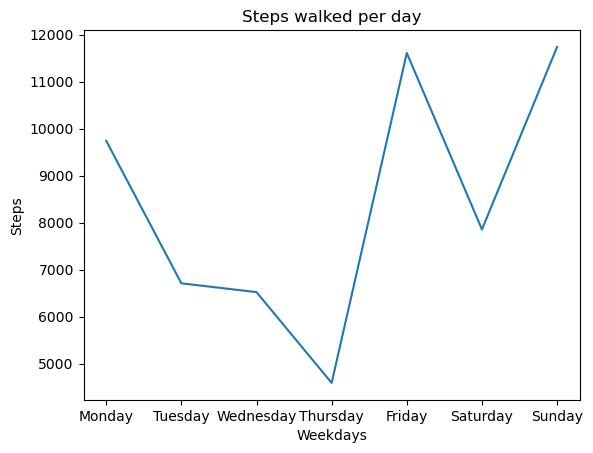

In [32]:
# your code here
plt.plot(weekdays, steps)
plt.xlabel('Weekdays')
plt.ylabel('Steps')
plt.title('Steps walked per day')
plt.show()


One commonly set goal is to reach 10.000 steps per day. Let's add the 10.000 daily steps target to our plot. Repeat your code from before, but before calling plt.show(), write plt.plot(...) with weekdays as x_values and 7 times 10000 as y_values.

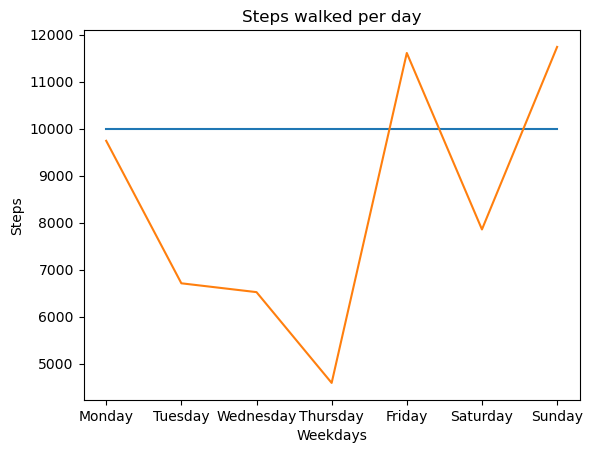

In [34]:
plt.plot(weekdays, [10000 for _ in range(7)])
plt.plot(weekdays, steps)
plt.xlabel('Weekdays')
plt.ylabel('Steps')
plt.title('Steps walked per day')
plt.show()

Now we have two lines: one for our actual daily steps, and one for the daily target of 10.000 steps. Let us add a legend to our plot to include this information. Do this by including the label parameter in each of your plt.plot() functions (e.g., `plt.plot(..., label="label")`), and call `plt.legend()` before plt.show().

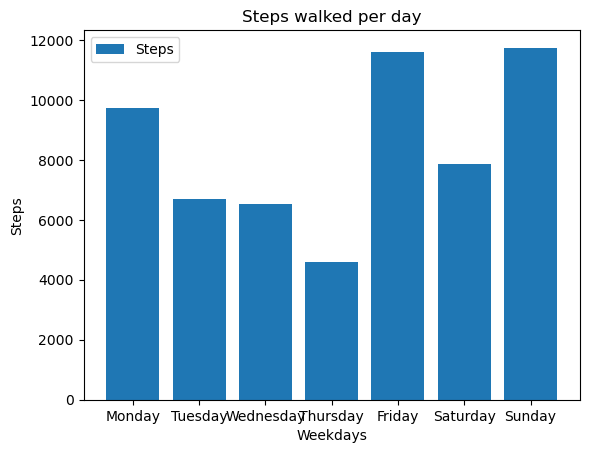

In [35]:
# your code here
plt.bar(weekdays, steps)
plt.xlabel('Weekdays')
plt.ylabel('Steps')
plt.title('Steps walked per day')
plt.legend(['Steps'])


Finally, let's add a title and labels for the x-axis and y-axis. We can do so by calling `plt.title("title")`, `plt.xlabel("xlabel")`, and `plt.ylabel("ylabel")` before plt.show(). Create a final version of your plot with corresponding title and labels below.

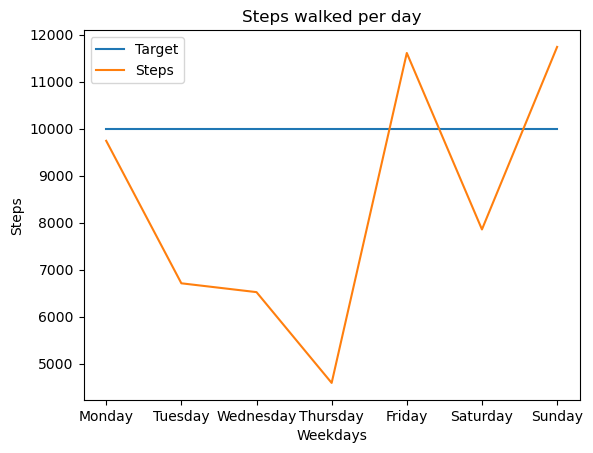

In [36]:
# your code here
plt.plot(weekdays, [10000 for _ in range(7)])
plt.plot(weekdays, steps)
plt.xlabel('Weekdays')
plt.ylabel('Steps')
plt.title('Steps walked per day')
plt.legend(['Target', 'Steps'])
plt.show()
